In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler, MaxAbsScaler
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectFromModel

In [21]:
svc = SVC()
minMax = MinMaxScaler()
norm = Normalizer()
stdSc = StandardScaler()
robustSc = RobustScaler()
maxAbs = MaxAbsScaler()

In [12]:
file = open('ClaMP_Integrated.csv')
df = pd.read_csv(file, encoding='utf-8')

In [20]:
pt = df['packer_type'].unique()
p_types = {pt[i] : i for i in range(len(pt))}

In [5]:
temp = []
for t in df['packer_type']:
    temp.append(p_types[t])
df['pt_num'] = temp
y = df.pop('class')
df.pop('packer_type')
x_train, x_test, y_train, y_test = train_test_split(df, y, random_state=0)

In [22]:
X_train_minmaxSc = minMax.fit_transform(x_train)
X_test_minmaxSc = minMax.transform(x_test)

X_train_norm = norm.fit_transform(x_train)
X_test_norm = norm.transform(x_test)

X_train_std = stdSc.fit_transform(x_train)
X_test_std = stdSc.transform(x_test)

X_train_robust = robustSc.fit_transform(x_train)
X_test_robust = robustSc.transform(x_test)

X_train_maxAbs = maxAbs.fit_transform(x_train)
X_test_maxAbs = maxAbs.transform(x_test)

In [25]:
svc.fit(x_train, y_train)
print('Правильность на исходном наборе: {:.4f}'.format(
    svc.score(x_test, y_test)
))

svc.fit(X_train_minmaxSc, y_train)
print('Правильность после MinMaxScaler: {:.4f}'.format(
    svc.score(X_test_minmaxSc, y_test)
))

svc.fit(X_train_norm, y_train)
print('Правильность после Normalizer: {:.4f}'.format(
    svc.score(X_test_norm, y_test)
))

svc.fit(X_train_std, y_train)
print('Правильность после StandardScaler: {:.4f}'.format(
    svc.score(X_test_std, y_test)
))

svc.fit(X_train_robust, y_train)
print('Правильность после RobustScaler: {:.4f}'.format(
    svc.score(X_test_robust, y_test)
))

svc.fit(X_train_maxAbs, y_train)
print('Правильность после MaxAbsScaler: {:.4f}'.format(
    svc.score(X_test_maxAbs, y_test)
))

Правильность на исходном наборе: 0.5510
Правильность после MinMaxScaler: 0.9371
Правильность после Normalizer: 0.8058
Правильность после StandardScaler: 0.9601
Правильность после RobustScaler: 0.6953
Правильность после MaxAbsScaler: 0.9355


Index(['e_cblp', 'e_cp', 'e_cparhdr', 'e_maxalloc', 'e_sp', 'e_lfanew',
       'NumberOfSections', 'CreationYear', 'FH_char0', 'FH_char1', 'FH_char2',
       'FH_char3', 'FH_char4', 'FH_char5', 'FH_char6', 'FH_char7', 'FH_char8',
       'FH_char9', 'FH_char10', 'FH_char11', 'FH_char12', 'FH_char13',
       'FH_char14', 'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase',
       'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfImage',
       'SizeOfHeaders', 'CheckSum', 'Subsystem', 'OH_DLLchar0', 'OH_DLLchar1',
       'OH_DLLchar2', 'OH_DLLchar3', 'OH_DLLchar4', 'OH_DLLchar5',
       'OH_DLLchar6', 'OH_DLLchar7', 'OH_DLLchar8', 'OH_DLLchar9',
       'OH_DLLchar10', 'SizeOfStackReserve', 'SizeO

Text(0.5, 0, 'Индекс примера')

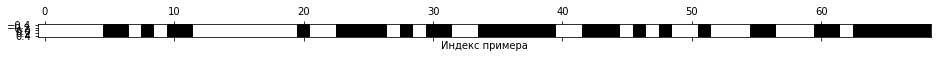

In [10]:
print(df.columns)
selectedModel = SelectFromModel(RandomForestClassifier(n_estimators=500, max_depth=100), threshold = 'median')
selectedModel.fit(x_train, y_train)
selectedModel.transform(x_train)
mask = selectedModel.get_support()

mask = mask.reshape(1, -1)
plt.matshow(mask, fignum=3, cmap='gray_r')
print(mask.shape)
plt.xlabel('Индекс примера')